In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sm_stat
import operator
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_file(filename):
    lst = []
    with open(filename, 'r') as f:
        for line in f:
            lst.append(float(line))
    return lst

data = load_file('wacf2.txt')
print(len(data))
#Без послдених 3 точек
data_train = data[:-3]

100


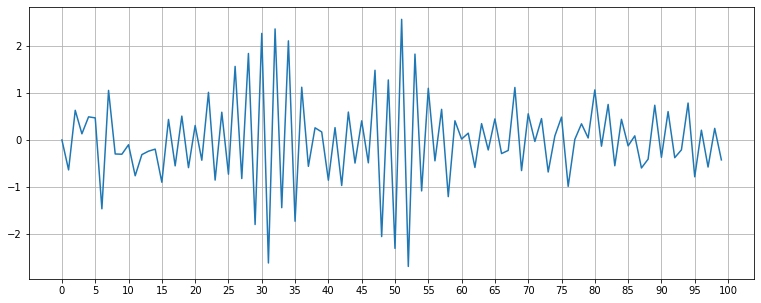

In [4]:
def show_plot(y, x_ticks):
 plt.figure(figsize=(13,5))
 plt.plot(y)
 plt.grid()
 plt.xticks(np.arange(0, len(y)+1, x_ticks))
 plt.show()
show_plot(data, 5)

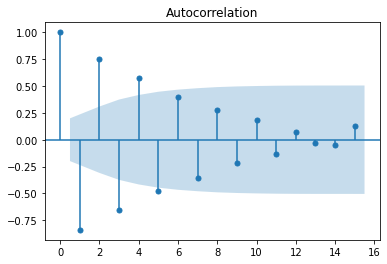

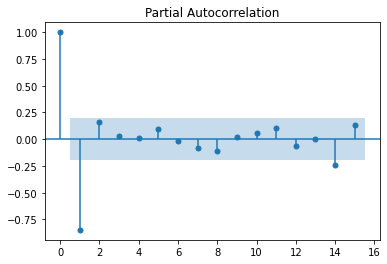

In [5]:
sm.graphics.tsa.plot_acf(data_train, lags=15) 
sm.graphics.tsa.plot_pacf(data_train, lags=15)
plt.show()

In [6]:
class ModelParams:
    def __init__(self, p=0, d=0, q=0, P=0, Q=0, D=0, s=0, tvalues=0, pvalues=0, AIC=0, BIC=0, trend=None):
        self.p = p
        self.d = d
        self.q = q
        self.P = P
        self.D = D
        self.Q = Q
        self.s = s
        self.tvalues = tvalues
        self.pvalues = pvalues
        self.AIC = AIC
        self.BIC = BIC
        self.trend = trend
        self.sum_metric = (AIC + BIC) / 2
        
model_params = []

for p in range(1+1):
    for q in range(5+1):
        if p == 0 and q == 0:
            continue
        model = sm.tsa.ARIMA(data_train, order=(p, 0, q)).fit(full_output=True, disp=0)
        print(model.summary().tables[0])
        print(model.summary().tables[1])
        mp = ModelParams(p=p, q=q, tvalues=model.tvalues, pvalues=model.pvalues, AIC=model.aic, BIC=model.bic)
        model_params.append(mp)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   97
Model:                     ARMA(0, 1)   Log Likelihood                -108.552
Method:                       css-mle   S.D. of innovations              0.739
Date:                Sat, 03 Apr 2021   AIC                            223.105
Time:                        11:05:29   BIC                            230.829
Sample:                             0   HQIC                           226.228
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.029     -0.150      0.881      -0.062       0.053
ma.L1.y       -0.6179      0.061    -10.163      0.000      -0.737      -0.499
                              ARMA Model Results    

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.034     -0.201      0.841      -0.074       0.060
ar.L1.y       -0.8802      0.053    -16.565      0.000      -0.984      -0.776
ma.L1.y        0.1655      0.112      1.480      0.139      -0.054       0.385
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   97
Model:                     ARMA(1, 2)   Log Likelihood                 -78.107
Method:                       css-mle   S.D. of innovations              0.538
Date:                Sat, 03 Apr 2021   AIC                            166.214
Time:                        11:05:30   BIC                            179.088
Sample:                             0   HQIC                           171.420
                                                    

In [7]:
nc_models_params = []
for p in range(1+1):
    for q in range(5+1):
        if p == 0 and q == 0:
            continue
        model = sm.tsa.ARIMA(data_train, order=(p, 0, q)).fit(trend='nc')
        print(model.summary().tables[0])
        print(model.summary().tables[1])
        mp = ModelParams(p=p, q=q, tvalues=model.tvalues, pvalues=model.pvalues, AIC=model.aic, BIC=model.bic)
        nc_models_params.append(mp)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   97
Model:                     ARMA(0, 1)   Log Likelihood                -108.564
Method:                       css-mle   S.D. of innovations              0.739
Date:                Sat, 03 Apr 2021   AIC                            221.127
Time:                        11:05:31   BIC                            226.277
Sample:                             0   HQIC                           223.209
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y       -0.6176      0.061    -10.164      0.000      -0.737      -0.499
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observat

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.8677      0.062    -13.891      0.000      -0.990      -0.745
ma.L1.y        0.1632      0.120      1.361      0.173      -0.072       0.398
ma.L2.y        0.0536      0.106      0.508      0.612      -0.153       0.261
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   97
Model:                     ARMA(1, 3)   Log Likelihood                 -78.110
Method:                       css-mle   S.D. of innovations              0.538
Date:                Sat, 03 Apr 2021   AIC                            166.219
Time:                        11:05:32   BIC                            179.093
Sample:                             0   HQIC                           171.425
                                                    

In [8]:
sorted_model_params = sorted(nc_models_params, key=operator.attrgetter('sum_metric'))

In [17]:
fit_models = []
for m in sorted_model_params:
    if max(m.pvalues) > 0.05:
        continue 
    fit_models.append(m)
 
print("Количество скомпилированных моделей: {} \n"
 "Количество моделей только со значимыми членами: {} \n".format(len(sorted_model_params), len(fit_models)))
for  m  in  fit_models:
    print("ARIMA  ({},{},{})\n  p-values:  {}  \nAIC:  {}  BIC:  {}  Sum_metric:  {}\n".
          format( m.p,  m.d,  m.q,  m.pvalues,  m.AIC,  m.BIC,  m.sum_metric))

Количество скомпилированных моделей: 11 
Количество моделей только со значимыми членами: 6 

ARIMA  (1,0,0)
  p-values:  [5.65659611e-54]  
AIC:  162.5758609060745  BIC:  167.72528286308125  Sum_metric:  165.15057188457786

ARIMA  (0,0,5)
  p-values:  [3.38169975e-14 3.21982965e-09 3.78147886e-05 2.70297546e-05
 4.18606460e-03]  
AIC:  171.68273433885355  BIC:  187.13100020987383  Sum_metric:  179.4068672743637

ARIMA  (0,0,4)
  p-values:  [6.09423969e-10 2.19653967e-08 1.57787601e-04 2.48228603e-03]  
AIC:  177.3433027915674  BIC:  190.21685768408432  Sum_metric:  183.78008023782587

ARIMA  (0,0,3)
  p-values:  [3.87581154e-09 9.72435981e-11 1.30728323e-02]  
AIC:  186.17263452976493  BIC:  196.47147844377847  Sum_metric:  191.32205648677171

ARIMA  (0,0,2)
  p-values:  [8.66309988e-19 6.39179865e-11]  
AIC:  191.00494792293108  BIC:  198.72908085844122  Sum_metric:  194.86701439068617

ARIMA  (0,0,1)
  p-values:  [2.8693385e-24]  
AIC:  221.12729881393824  BIC:  226.27672077094502  S

In [23]:
models = {}
test_table = PrettyTable()
test_table.field_names = ["Модель ARIMA", "ljungbox_stat", "p-value"]
for m in fit_models:
    model = sm.tsa.ARIMA(data_train, order=(m.p, 0, m.q)).fit(trend='nc')
    models[f"ARIMA({m.p},0,{m.q})"] = model
    model_name = f"ARIMA({m.p},0,{m.q})"
    test_results = sm_stat.diagnostic.acorr_ljungbox(model.resid, lags=[10])
    test_table.add_row([model_name, test_results[0][0], test_results[1][0]])
print(test_table)

+--------------+--------------------+------------------------+
| Модель ARIMA |   ljungbox_stat    |        p-value         |
+--------------+--------------------+------------------------+
| ARIMA(1,0,0) | 6.0116129000012295 |   0.8142866364941548   |
| ARIMA(0,0,5) | 8.564446616561805  |   0.5738761529786066   |
| ARIMA(0,0,4) | 22.768421536507134 |  0.011634414256660543  |
| ARIMA(0,0,3) | 38.63730326635324  | 2.938200295187241e-05  |
| ARIMA(0,0,2) | 52.43018080053674  | 9.498188388499153e-08  |
| ARIMA(0,0,1) | 127.76060228452829 | 1.3366244706821337e-22 |
+--------------+--------------------+------------------------+


In [11]:
data_train_len = len(data_train)
print("Модель       | Знач[-3] | △Знач | Знач[-2] | △Знач  | Знач[-1] | △Знач | Сумма △знач")
print("------------------------------------------------------------------------------------------------")
print("Исходные     |  {:.3f}  | {:.3f}  | {:.3f}   | {:.3f}   | {:.3f}  | {:.3f} | {:2.3f}".format(
    round(data[-3], 3), 0,
    round(data[-2], 3), 0,
    round(data[-1], 3), 0, 0))
predicts_by_model = {}
for modelname, model in models.items():
    predict = model.predict(data_train_len, data_train_len + 2)
    predict_results = list(predict[-3:])
    print("{} |  {:.3f}  | {:.3f}  | {:.3f}   | {:.3f}  | {:.3f} | {:.3f} | {:2.3f} ".format(
        modelname,
        round(predict_results[-3], 3),
        round(abs(predict_results[-3] - data[-3]), 3),
        round(predict_results[-2], 3),
        round(abs(predict_results[-2] - data[-2]), 3),
        round(predict_results[-1], 3),
        round(abs(predict_results[-1] - data[-1]), 3),
        round(sum([abs(predict_results[i] - data[i]) for i in range(-3, 0)]), 3)))

Модель       | Знач[-3] | △Знач | Знач[-2] | △Знач  | Знач[-1] | △Знач | Сумма △знач
------------------------------------------------------------------------------------------------
Исходные     |  -0.578  | 0.000  | 0.248   | 0.000   | -0.425  | 0.000 | 0.000
ARIMA(1,0,0) |  -0.174  | 0.404  | 0.144   | 0.103  | -0.120 | 0.305 | 0.812 
ARIMA(0,0,5) |  -0.255  | 0.322  | 0.058   | 0.190  | 0.000 | 0.425 | 0.937 
ARIMA(0,0,4) |  -0.145  | 0.433  | -0.070   | 0.318  | 0.000 | 0.425 | 1.176 
ARIMA(0,0,3) |  0.012  | 0.590  | -0.177   | 0.425  | 0.000 | 0.425 | 1.440 
ARIMA(0,0,2) |  -0.001  | 0.576  | -0.079   | 0.326  | 0.000 | 0.425 | 1.327 
ARIMA(0,0,1) |  0.022  | 0.600  | 0.000   | 0.248  | 0.000 | 0.425 | 1.272 


In [15]:
table = PrettyTable()
table.field_names = ["Модель ARIMA", "Знач[-3]", "△Знач3", "Знач[-2]", "△Знач2", "Знач[-1]", "△Знач1", "Сумма △знач"]
table.add_row(["Исходные", round(data[-3], 3), 0, round(data[-2], 3), 0, round(data[-1], 3), 0, 0])
for modelname, model in models.items():
    predict = model.predict(data_train_len, data_train_len + 2)
    predict_results = list(predict[-3:])
    table.add_row([modelname,  round(predict_results[-3], 3), round(abs(predict_results[-3] - data[-3]), 3),
              round(predict_results[-2], 3), round(abs(predict_results[-2] - data[-2]), 3),
              round(predict_results[-1], 3), round(abs(predict_results[-1] - data[-1]), 3),
              round(sum([abs(predict_results[i] - data[i]) for i in range(-3, 0)]), 3)])
print(table)

+--------------+----------+--------+----------+--------+----------+--------+-------------+
| Модель ARIMA | Знач[-3] | △Знач3 | Знач[-2] | △Знач2 | Знач[-1] | △Знач1 | Сумма △знач |
+--------------+----------+--------+----------+--------+----------+--------+-------------+
|   Исходные   |  -0.578  |   0    |  0.248   |   0    |  -0.425  |   0    |      0      |
| ARIMA(1,0,0) |  -0.174  | 0.404  |  0.144   | 0.103  |  -0.12   | 0.305  |    0.812    |
| ARIMA(0,0,5) |  -0.255  | 0.322  |  0.058   |  0.19  |   0.0    | 0.425  |    0.937    |
| ARIMA(0,0,4) |  -0.145  | 0.433  |  -0.07   | 0.318  |   0.0    | 0.425  |    1.176    |
| ARIMA(0,0,3) |  0.012   |  0.59  |  -0.177  | 0.425  |   0.0    | 0.425  |     1.44    |
| ARIMA(0,0,2) |  -0.001  | 0.576  |  -0.079  | 0.326  |   0.0    | 0.425  |    1.327    |
| ARIMA(0,0,1) |  0.022   |  0.6   |   0.0    | 0.248  |   0.0    | 0.425  |    1.272    |
+--------------+----------+--------+----------+--------+----------+--------+-------------+